# Simulator runner

In [2]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
from utilitysim import InferenceJob, TrainingJob, get_optimus_fn, get_tanh_fn, get_linear_fn, get_tanh_fn, simulator, thief_scheduler, fair_scheduler

In [16]:
def define_workload():
    a_conv_time = 150
    b_conv_time = 300
    target_start_accuracy = 50
    
    retraining_period = 200
    total_resources = 1
    
    a_func, a_inv_func = get_optimus_fn(a_conv_time)
    b_func, b_inv_func = get_optimus_fn(b_conv_time)
    init_time_a = a_inv_func(target_start_accuracy)
    init_time_b = b_inv_func(target_start_accuracy)

    A_inference = InferenceJob("A_inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
    B_inference = InferenceJob("B_inference", target_start_accuracy, get_tanh_fn(2)[0], resource_alloc=0)
    A_train = TrainingJob("A_train", a_func, init_time_a, a_conv_time, resource_alloc=0, inference_job=A_inference)
    B_train = TrainingJob("B_train", b_func, init_time_b, b_conv_time, resource_alloc=0, inference_job=B_inference)

    training_jobs = [A_train, B_train]
    inference_jobs = [A_inference, B_inference]
    
    inference_only_alloc = {'A_train': 0,
                            'B_train': 0,
                            'A_inference': 0.5,
                            'B_inference': 0.5,}
    
    return training_jobs, inference_jobs, total_resources, retraining_period, inference_only_alloc

## Run comparison

In [17]:
data = {}

# Fair Scheduler
training_jobs, inference_jobs, total_resources, retraining_period, inference_only_alloc = define_workload()
sim = simulator(training_jobs, inference_jobs, total_resources, retraining_period=retraining_period, sim_name='main')
results = sim.step_till_completion()
data['fair'] = results['meta']['inf_mean_auc']

# thief Scheduler
training_jobs, inference_jobs, total_resources, retraining_period, inference_only_alloc = define_workload()
sim = simulator(training_jobs, inference_jobs, total_resources, retraining_period=retraining_period,
                scheduling_algo=thief_scheduler, sim_name='main')
results = sim.step_till_completion()
data['thief'] = results['meta']['inf_mean_auc']

# Inference only scheduler
training_jobs, inference_jobs, total_resources, retraining_period, inference_only_alloc = define_workload()
sim = simulator(training_jobs, inference_jobs, total_resources, retraining_period=retraining_period,
                scheduling_algo=fair_scheduler, initial_allocation=inference_only_alloc, sim_name='main')
results = sim.step_till_completion()
data['inference_only'] = results['meta']['inf_mean_auc']

Period allocation: {0: {'A_train': 0.25, 'B_train': 0.25, 'A_inference': 0.25, 'B_inference': 0.25}, 540.0: {'A_train': 0, 'B_train': 0.3333333333333333, 'A_inference': 0.3333333333333333, 'B_inference': 0.3333333333333333}, 945.0: {'A_train': 0, 'B_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
Si

{0: {0: {'A_train': 0.25, 'B_train': 0.25, 'A_inference': 0.25, 'B_inference': 0.25}, 540.0: {'A_train': 0, 'B_train': 0.3333333333333333, 'A_inference': 0.3333333333333333, 'B_inference': 0.3333333333333333}, 945.0: {'A_train': 0, 'B_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}}, 1: {0: {'A_train': 0.35, 'B_train': 0.15, 'A_inference': 0.25, 'B_inference': 0.25}, 385.7142857142857: {'A_train': 0, 'B_train': 0.26666666666666666, 'A_inference': 0.36666666666666664, 'B_inference': 0.36666666666666664}, 1181.25: {'B_train': 0, 'A_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}}, 2: {0: {'A_train': 0.45, 'B_train': 0.04999999999999999, 'A_inference': 0.25, 'B_inference': 0.25}, 300.0: {'A_train': 0, 'B_train': 0.19999999999999998, 'A_inference': 0.4, 'B_inference': 0.4}, 1575.0: {'B_train': 0, 'A_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}}, 3: {0: {'A_train': 0.25, 'B_train': 0.25, 'A_inference': 0.25, 'B_inference': 0.25}, 540.0: {'A_train': 0, 'B_train': 0.33333333333333

151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
Simulator steps done.
Period allocation: {0: {'A_train': 0, 'B_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}, 9999999: {'A_train': 0, 'B_train': 0, 'A_inference': 0.5, 'B_inference': 0.5}}
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
17

In [18]:
data

{'fair': 8.028712781306883,
 'thief': 27.567614792143488,
 'inference_only': 25.0}

# Visualization

### Comparison

<IPython.core.display.Javascript object>


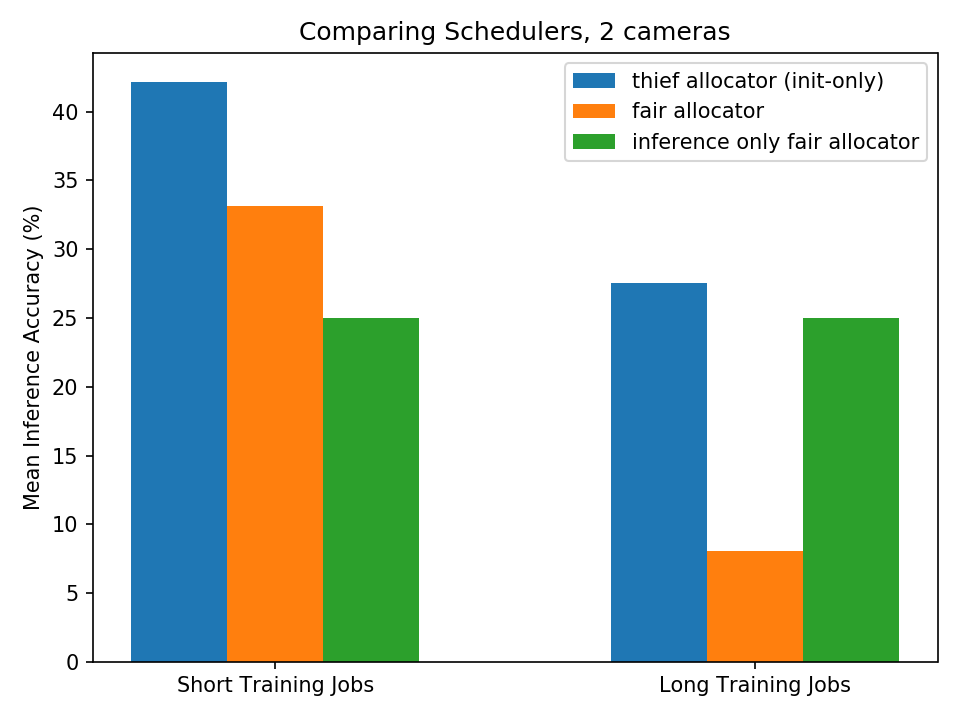

In [19]:
import numpy as np

labels = ['Short Training Jobs', 'Long Training Jobs'] # [5, 30, 200], [150, 300, 200]
fair = [33.101832623120124, 8.028712781306883]
thief = [42.15057466825695, 27.567614792143488]
inference_only = [25.0, 25.0]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(x - width, thief, width, label='thief allocator (init-only)')
rects1 = ax.bar(x , fair, width, label='fair allocator')
rects3 = ax.bar(x + width, inference_only, width, label='inference only fair allocator')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mean Inference Accuracy (%)')
ax.set_title('Comparing Schedulers, 2 cameras')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

### Accuracy progression

Text(0, 0.5, 'Accuracy')

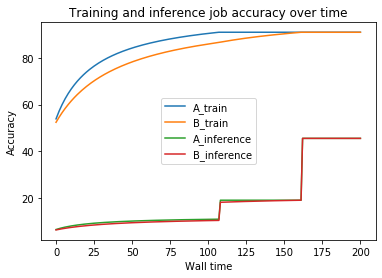

In [8]:
plt.figure()
for job, result in results.items():
    if job != 'meta':
        t, acc = list(zip(*result))
        plt.plot(t, acc, label=job.name)
plt.title("Training and inference job accuracy over time")
plt.legend()
plt.xlabel("Wall time")
plt.ylabel("Accuracy")

In [ ]:
for t, allocation in sim.period_allocation.items():
    names = []
    allocs = []
    for j, alloc in allocation.items():
        allocs.append(alloc)
        names.append(j.name)
    print(names, allocs)
    plt.figure()
    plt.pie(allocs, labels=names, autopct='%1.1f%%',
        shadow=True, startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
    plt.title("Allocation at t = {}".format(t))

In [ ]:
means = []
for j, result in results.items():
    if isinstance(j, InferenceJob):
        mean_accuracy = sum(r[1] for r in result)/len(result)
        means.append(mean_accuracy)
MEAN_AUC = sum(means)/len(means)
print("Mean Inference Accuracy across all jobs: {}".format(MEAN_AUC))

In [ ]:
results['meta']